<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [4]:
sac_csv = './data/sacramento_real_estate_transactions.csv'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

In [6]:
df=pd.read_csv(sac_csv)
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [7]:
df.dtypes


street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
df.shape

(985, 12)

In [9]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [10]:
#better to change zipcode bc pandas removes the first 0 in the zipcode if its there ex: 01234
df['zip']=df['zip'].astype(str)

In [11]:
df.dtypes


street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [12]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [13]:
# Looks like we have some values that seem out of place being that there are
# houses with 0 bedrooms,  0 baths, a negative sqr footage and a negative price.  
# There are also some bizarre longitudes/latitudes. A house in Antartica perhaps.

In [14]:
df.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
POLLOCK PINES        3
RANCHO MURIETA       3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
PENRYN               1
GREENWOOD            1
DIAMOND SPRINGS      1
MATHER               1
SHINGLE SPRINGS      1
GARDEN VALLEY        1
MEADOW VISTA         1
FORESTHILL           1
SLOUGHHOUSE          1
WALNUT GROVE         1
COOL                 1
Name: city, dtype: int64

In [15]:
# check houses with 0 bedrooms
df[df['beds']==0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


In [16]:
df[df['beds']==0].shape

(108, 12)

In [17]:
# Given the large value of houses that have 0 beds, 0 baths and 0 square feet 
# I am going to make an assumption that these are plots of land that have yet
# to have anything built on them.
# As a result I will *not* be dropping them.

In [18]:
df[df['price']<1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [19]:
df[df['sq__ft']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [20]:
# Looks like the house with a negative price is also the one with a negative squarefeet.

#  the state is  labeled wrong as well.

In [21]:
#Check if any other values are also not labeled right
df[df['state']!='CA']


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [22]:
#Looks like it is just one row, so I am going to drop it.

df.drop(703, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

C:\Users\shafik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


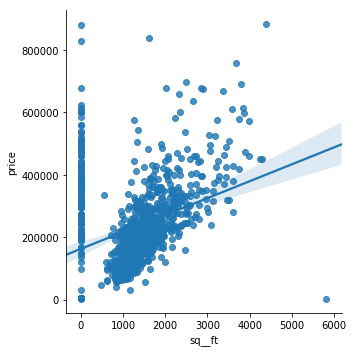

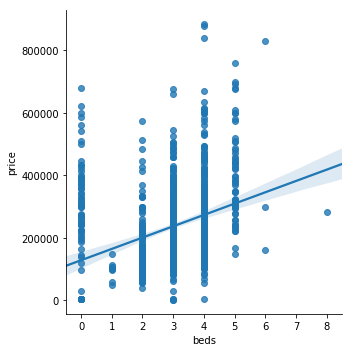

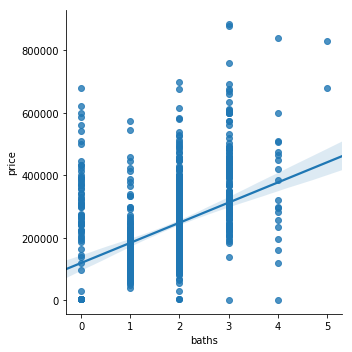

In [23]:
# plot for 'beds','baths','sq__ft' vs price
sns.lmplot(x='sq__ft', y='price', data=df)
plt.show()
sns.lmplot(x='beds', y='price', data=df)
plt.show()
sns.lmplot(x='baths', y='price', data=df)
plt.show()

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [ ]:
# It looks like Square Footage is a better predictor than Beds or Baths.
# Beds and Baths are discrete measures as opposed to Square feet, which is continuous.  
# Additionally, there is probably some strong coorelations between them in that houses 
# with bigger square feet will have more beds and more baths.

# If we dropped all the plots of land that are in the dataset (those with 0 sq ft, 
# beds & baths)  we would see a much stronger trend line in our lm plot.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
#Train our model
x=df['sq__ft']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(787,)
(197,)
(787,)
(197,)


In [28]:
#convert to matrix or you i will  get an error with the fit
#from numpy import reshape
from numpy import array

print(type(X_train))


X_train = array(X_train)
y_train= array(y_train)
X_test=array(X_test)
y_test=array(y_test)

X_train=X_train.reshape((X_train.shape[0], 1))
y_train=y_train.reshape((y_train.shape[0], 1))
X_test=X_test.reshape((X_test.shape[0], 1))
y_test=y_test.reshape((y_test.shape[0], 1))


<class 'pandas.core.series.Series'>


In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(787, 1)
(787, 1)
(197, 1)
(197, 1)


In [30]:
#istanatiate , creating an instance of linear regresion model ,so iam creating linear regression object
lm = LinearRegression()

In [31]:
#in order to fit or train my model on the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# print the intercept
print(lm.intercept_)

[171033.69932738]


In [33]:
lm.coef_

array([[49.23397089]])

In [34]:
#predict:
predictions = lm.predict(X_test)

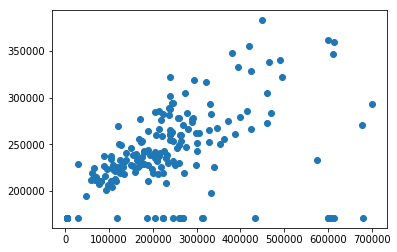

In [35]:
plt.scatter(y_test,predictions);

In [36]:
#check shape
print(y_test.shape)
print(predictions.shape)
print(type(y_test))

#convert 2d array to 1d array using .ravel()
 
predictions1=predictions.ravel()
y_test1 = y_test.ravel()
print(type(y_test1))
print(y_test1.shape)
print(predictions1.shape)

#create a data frame to make a  better plot with seaborn
df1 = pd.DataFrame({'predict_price':y_test1,'acual_price':predictions1})

(197, 1)
(197, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(197,)
(197,)


C:\Users\shafik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


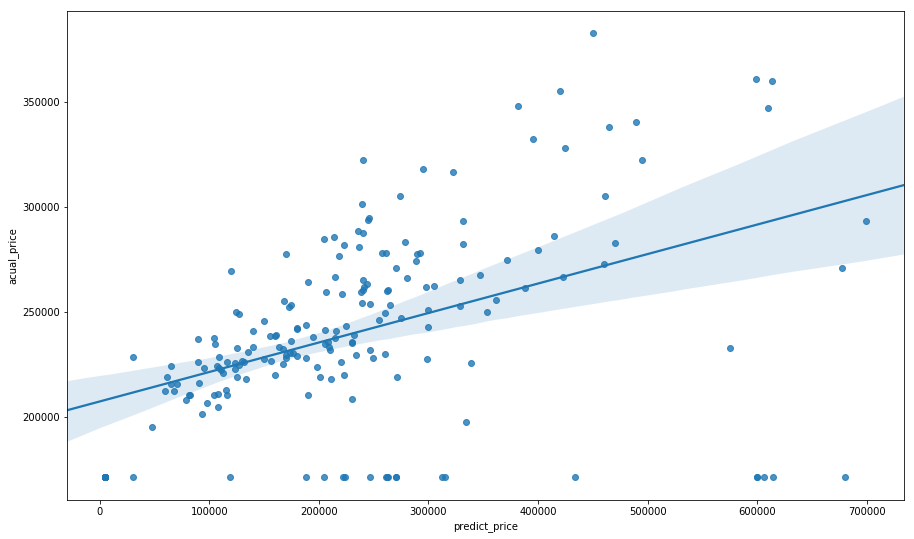

In [63]:
# One more plot, Lets look how our Predictions compared to the true values.
plt.subplots(figsize=(15,9))
sns.regplot(x='predict_price', y='acual_price', data=df1);


C:\Users\shafik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


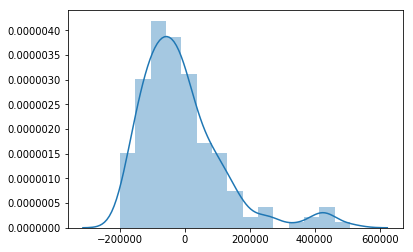

In [38]:
#Residual is the differance between acual value y-test and the predicted value y hat 
#if u have a normally distributed residuals , it means it was the correct choice (model) for your data
sns.distplot((y_test-predictions)); #subtract to get residuals

In [39]:
#evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 95751.02012595322
MSE: 16862996216.569181
RMSE: 129857.59976439262


### 6. Interpret the intercept. Interpret the slope.

In [ ]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [ ]:
# A: